In [ ]:
%pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2 as cv
import os


Data Check

In [2]:
img_path = "Training/Training/Happy/Happy-14.jpg"
img = image.load_img("Training/Training/Happy/Happy-14.jpg")

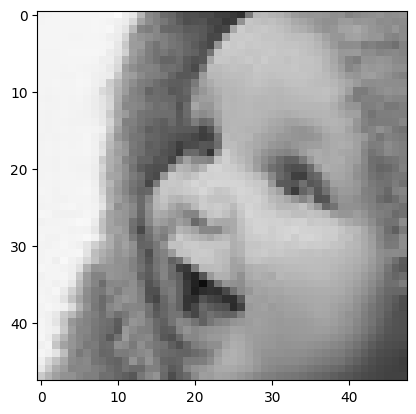

In [3]:
plt.imshow(img)

In [4]:
cv.imread(img_path).shape

(48, 48, 3)

Load Data

In [5]:
train_dir = ('Training/Training/')
test_dir = ('Testing/Testing/')

In [6]:
def load_data(dir_path, img_size):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv.resize(img, img_size, interpolation = cv.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [8]:
img_size = (48, 48)

In [9]:
X_train, y_train, train_labels = load_data(train_dir, img_size)

100%|██████████| 6/6 [01:05<00:00, 10.91s/it]


28273 images loaded from Training/Training/ directory.


In [10]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [11]:
X_test, y_test, test_labels = load_data(test_dir, img_size)

100%|██████████| 6/6 [00:01<00:00,  4.80it/s]


7067 images loaded from Testing/Testing/ directory.


In [12]:
Y_train = to_categorical(y_train, num_classes=6)
Y_train.shape

(28273, 6)

In [13]:
Y_test = to_categorical(y_test, num_classes=6)
Y_test.shape

(7067, 6)

Model Building

In [14]:
model = Sequential()

In [15]:
# Convolutional Layer

# Layer pertama
model.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer kedua
model.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model.add(MaxPooling2D((2, 2)))

# Layer ketiga
model.add(Conv2D(128, (3, 3), activation='leaky_relu'))
model.add(MaxPooling2D((2, 2)))

In [16]:
# Layer Flatten dan Dense
model.add(Flatten())
model.add(Dense(128, activation='leaky_relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [17]:
# Kompilasi model
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [18]:
class ModelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85):
      print("\nAkurasi telah mencapai > 85%!")
      self.model.stop_training = True

callbacks = ModelCallback()

In [19]:
# Melatih model
history = model.fit(X_train, Y_train, epochs=25, batch_size=64, validation_data=(X_test, Y_test), callbacks=[callbacks])

Epoch 1/25



442/442 [==============================] - 27s 59ms/step - loss: 1.5428 - accuracy: 0.3784 - val_loss: 1.3674 - val_accuracy: 0.4733
Epoch 2/25
442/442 [==============================] - 27s 60ms/step - loss: 1.2956 - accuracy: 0.4966 - val_loss: 1.2517 - val_accuracy: 0.5165
Epoch 3/25
442/442 [==============================] - 27s 61ms/step - loss: 1.1902 - accuracy: 0.5419 - val_loss: 1.2159 - val_accuracy: 0.5305
Epoch 4/25
442/442 [==============================] - 27s 62ms/step - loss: 1.1186 - accuracy: 0.5734 - val_loss: 1.1393 - val_accuracy: 0.5601
Epoch 5/25
442/442 [==============================] - 41s 92ms/step - loss: 1.0525 - accuracy: 0.5995 - val_loss: 1.1282 - val_accuracy: 0.5677
Epoch 6/25
442/442 [==============================] - 54s 123ms/step - loss: 0.9902 - accuracy: 0.6276 - val_loss: 1.1549 - val_accuracy: 0.5620
Epoch 7/25
442/442 [==============================] - 52s 117ms/step - loss: 0.9297 - accuracy: 0.6479 - val_loss: 1.1225 - val_accuracy: 0.5768
E

In [20]:
# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

221/221 [==============================] - 2s 10ms/step - loss: 2.1530 - accuracy: 0.5519

Test accuracy: 0.5519


In [24]:
model.save("./model/model.h5")

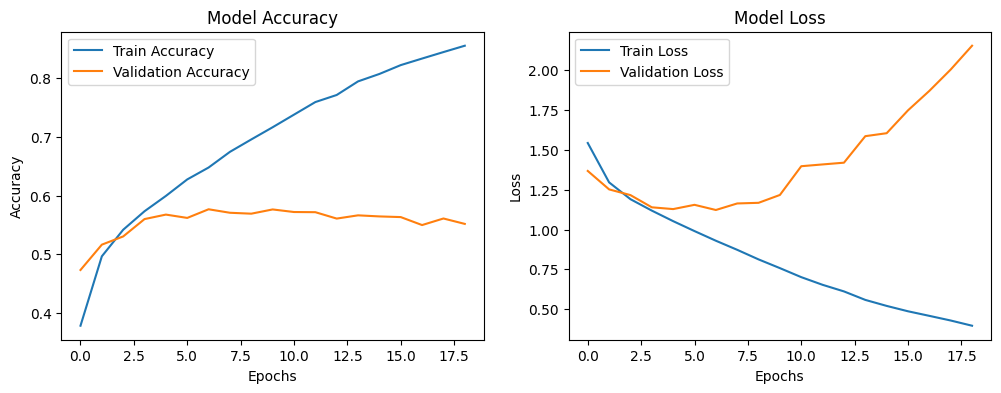

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()